In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
data = pd.read_csv('air_pollution_data.csv')
data.head()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [3]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

In [4]:
data['year'] = data['date'].dt.year

In [5]:
filtered_data = data[(data['year'] >= 2020) & (data['year'] <= 2023)]

In [6]:
avg_pm25 = filtered_data.groupby(['city', 'year'])['pm2_5'].mean().reset_index()

In [7]:
pivot_data = avg_pm25.pivot(index='city', columns='year', values='pm2_5').reset_index()

In [8]:
# Years as features
X = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)  
predictions = {}

In [9]:
# Train a separate model for each city
for _, row in pivot_data.iterrows():
    city = row['city']
    y = row.loc[2020:2023].values  # PM2.5 levels for the city
    model = LinearRegression()
    model.fit(X, y)
    predictions[city] = model.predict([[2024]])[0]

In [10]:
predicted_pm25 = pd.DataFrame(list(predictions.items()), columns=['city', 'pm2_5_2024'])

In [11]:
predicted_pm25 = predicted_pm25.sort_values(by='pm2_5_2024', ascending=False)
predicted_pm25.head()

,city,pm2_5_2024
18,Kolkata,191.252909
10,Delhi,164.090533
3,Amritsar,124.021651
16,Jorapokhar,120.783305
20,Mumbai,103.217542


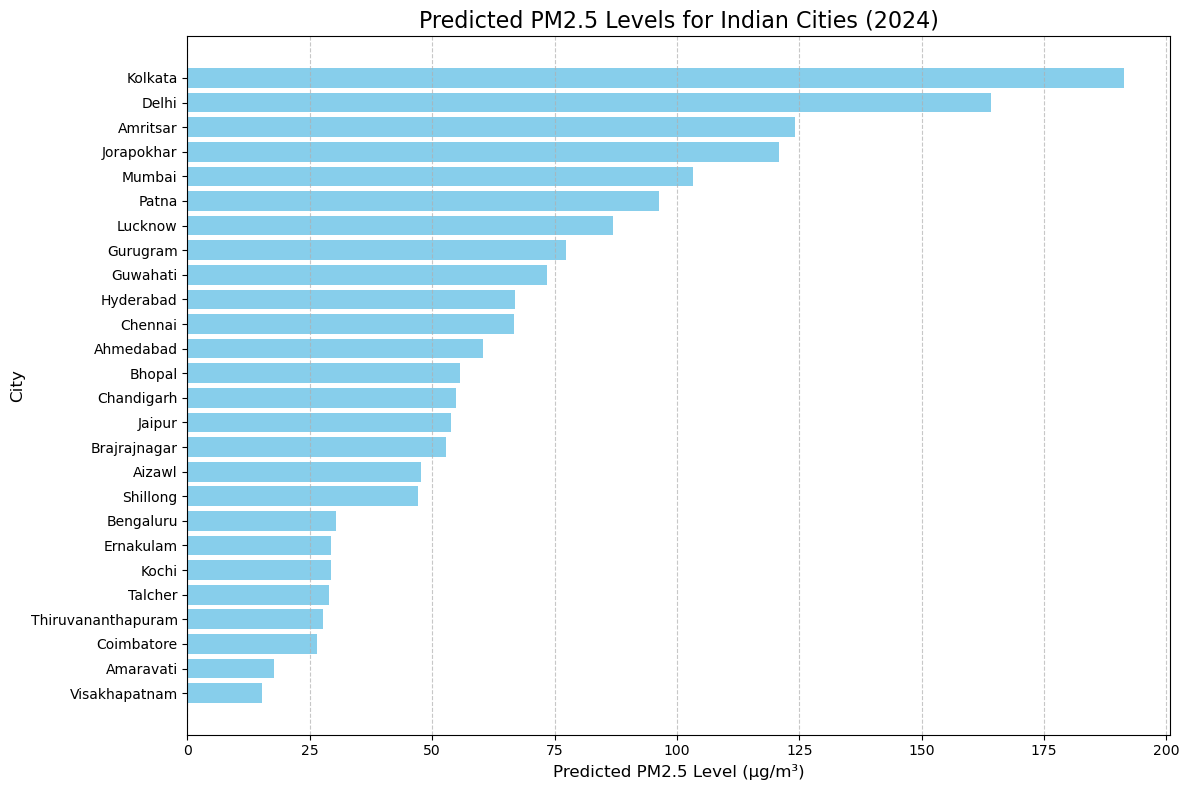

In [12]:
plt.figure(figsize=(12, 8))
plt.barh(predicted_pm25['city'], predicted_pm25['pm2_5_2024'], color='skyblue')
plt.xlabel('Predicted PM2.5 Level (µg/m³)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Predicted PM2.5 Levels for Indian Cities (2024)', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
r2_scores = []
mae_values = []

In [19]:
for _, row in pivot_data.iterrows():
    city = row['city']
    y_actual = row.loc[2020:2023].values
    model = LinearRegression()
    model.fit(X, y_actual)  
    y_predicted = model.predict(X)
    
    r2 = r2_score(y_actual, y_predicted)
    mae = mean_absolute_error(y_actual, y_predicted)
    
    
    r2_scores.append((city, r2))
    mae_values.append((city, mae))

In [20]:
r2_scores_df = pd.DataFrame(r2_scores, columns=['city', 'r2_score']).sort_values(by='r2_score', ascending=False)
mae_values_df = pd.DataFrame(mae_values, columns=['city', 'mae']).sort_values(by='mae', ascending=True)

In [21]:
r2_scores_df.head(), mae_values_df.head()

(          city  r2_score
 7   Chandigarh  0.941834
 10       Delhi  0.807083
 3     Amritsar  0.783481
 16  Jorapokhar  0.771856
 12    Gurugram  0.637455,
           city       mae
 7   Chandigarh  2.526708
 5       Bhopal  5.126648
 16  Jorapokhar  5.624569
 9   Coimbatore  8.649890
 4    Bengaluru  9.361025)